**General information:** 

Supervised Fraud Detection Analytics using Car’s Body insurance dataset of an Insurance company 
Domain and problem setting: Insurance fraud happens when policyholders file claims that are exaggerated, fake, or based on intentional damage with the objective to receive compensation from the companies. One of the ways to deal with damages is fraud detection.
This research creates a big-data analysis approach to detect fraud by analyzing car insurance fraud data 
**Research questions:** 

What are the best pre-possessing methods for this task? Do the data mining algorithms help decide on future fraudulent cases?

**Success criteria:** 

the success criterion is based on the algorithm’s ability in detecting fraudulent behavior from the data given. The success of the project relies also on finding high correlation features and potentially uncovering causal relationships during analysis.


**Group members** Aida Sadeghi, Sofia Basilio
Description of the dataset and its collection : the data concerned comes from an Iranian Insurance company, collected over a period of 10 years and consisting of claims that have been filed; the data is for third-party car insurance and will be used for evaluating the provided approach. The data contains about 100000 observations and because the labeled data is quite few we will use unlabelled methodologies.

**Plan for data analysis**
1.	Data cleaning and preparation to have a visualization of the holistic dataset 
2.	Use SMOTE sampling method to have a better dataset to work with (potentially Imbalanced classification tactics)
3.	Use unsupervised learning to cluster data sets using different methods
The preprocessing steps include: dealing with missing values, detecting outliers, uncovering correlated variables in the data, feature engineering - by adding features of the result of PAGE RANK algorithm and network features. Seventy percent of the data will then be used for training, and thirty will be used for testing, as to allow for a good number of cases to be used as unseen data.

**Implementation:**

data analysis, followed by the pre-processing and use of unsupervised learning methods for clustering and anomaly detection to label the data and further analyze the data. The results from the models are assessed and compared (between the different methods used), using model interpretation tools (such as Shapely), and lastly the test data is evaluated using performance measures.
Machine learning models implemented are clustering methods: isolation Forest, DBSCAN, One-class SVM
Performance measures Shapely, the ROC curve.


Expected outcome relies on the uncovering of novel information on the data which can explain the algorithm’s performance through data analysis. The use of ML models will help detect new fraudulent cases through cluster assignment on the test set, providing good performance. 
Model interpretation will be done through explainability methods such as Partial Dependence Displays (PDP), and Individual Conditional Expectation (ICE), as well as the use of external libraries such as LIME and SHAP values (Shapley Additive explanations). 
Deployment includes a jupyter notebook with each of the steps mentioned above (data analysis, pre-processing and ML applications) as well as a report on performance measures and results.


In [2]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

so let's load the data:

In [3]:
df = pd.read_csv("final-data.csv")
df.head(5)


,ID,FRAUD_LABEL,PREVIOUS_INS_CO_NAME,SUPERVISOR_ISSUE,PLACE_ISSUED,AGENT_NAME,HISTORY_OF_PERSONS_CLAIMS,CARS_ SILENDER,CAR_AGE\n,PREMIUM,CAR_VALUE,NO_PEOPLE_IN_CAR,YEAR_OF_FILE,MONTH_OF_FILE,DAY_OF_FILE,DISTRICT_OF_FILE
0,4.072016e+09,0.0,4.0,81.0,1150.0,2150.0,0.0,1.0,1388.0,3377088.0,120000000.0,4.0,1390.0,4.0,12.0,5.0
1,5.307637e+08,0.0,0.0,81.0,1150.0,2116.0,1.0,1.0,1390.0,11303885.0,750000000.0,5.0,1390.0,12.0,8.0,5.0
2,7.611784e+07,0.0,0.0,81.0,1150.0,2187.0,1.0,1.0,1384.0,1579220.0,80000000.0,4.0,1390.0,8.0,4.0,5.0
3,4.940005e+09,0.0,5.0,81.0,1150.0,2187.0,2.0,1.0,1385.0,1081389.0,85000000.0,4.0,1390.0,12.0,6.0,5.0
4,5.669363e+09,0.0,0.0,81.0,1150.0,2187.0,1.0,1.0,1388.0,1482624.0,120000000.0,5.0,1390.0,12.0,21.0,5.0


check for count for rows and cols

In [4]:
df.shape

(106752, 16)

Check the amount of label values:

In [5]:
df['FRAUD_LABEL'].value_counts()

0.0    106681
1.0        62
Name: FRAUD_LABEL, dtype: int64

as can be seen the labelled values are quite a few so we wont use the labels on this study

we delete the columns that are nor usefull for this study; e.g fraud labels year, month and day of policy issued
afterwards, we delete the nan and the files that dont have proper identification numbers.

In [6]:

# Dropping the fraud label
df = df.drop(["FRAUD_LABEL"], axis=1)
# dropping dates
df =  df.drop(['YEAR_OF_FILE', 'MONTH_OF_FILE', 'DAY_OF_FILE'], axis=1)


df = df.dropna()

# Dropping where ID == 0
df = df[(df['ID'] != 0)]

we check if the out put have any NA:

In [7]:
df.isna().sum()

ID                           0
PREVIOUS_INS_CO_NAME         0
SUPERVISOR_ISSUE             0
PLACE_ISSUED                 0
AGENT_NAME                   0
HISTORY_OF_PERSONS_CLAIMS    0
CARS_ SILENDER               0
CAR_AGE\n                    0
PREMIUM                      0
CAR_VALUE                    0
NO_PEOPLE_IN_CAR             0
DISTRICT_OF_FILE             0
dtype: int64

In [8]:
# Renaming the column because it has a character that shouldn't be there
df.rename(columns = {'CAR_AGE\n':'CAR_AGE'}, inplace = True)

In [9]:
df.columns

Index(['ID', 'PREVIOUS_INS_CO_NAME', 'SUPERVISOR_ISSUE', 'PLACE_ISSUED',
       'AGENT_NAME', 'HISTORY_OF_PERSONS_CLAIMS', 'CARS_ SILENDER', 'CAR_AGE',
       'PREMIUM', 'CAR_VALUE', 'NO_PEOPLE_IN_CAR', 'DISTRICT_OF_FILE'],
      dtype='object')

In [10]:
# all columns should be ints
df = df.astype('int')
df.head(5)


,ID,PREVIOUS_INS_CO_NAME,SUPERVISOR_ISSUE,PLACE_ISSUED,AGENT_NAME,HISTORY_OF_PERSONS_CLAIMS,CARS_ SILENDER,CAR_AGE,PREMIUM,CAR_VALUE,NO_PEOPLE_IN_CAR,DISTRICT_OF_FILE
0,-2147483648,4,81,1150,2150,0,1,1388,3377088,120000000,4,5
1,530763702,0,81,1150,2116,1,1,1390,11303885,750000000,5,5
2,76117839,0,81,1150,2187,1,1,1384,1579220,80000000,4,5
3,-2147483648,5,81,1150,2187,2,1,1385,1081389,85000000,4,5
4,-2147483648,0,81,1150,2187,1,1,1388,1482624,120000000,5,5


In [11]:
# printing info on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76179 entries, 0 to 106742
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         76179 non-null  int32
 1   PREVIOUS_INS_CO_NAME       76179 non-null  int32
 2   SUPERVISOR_ISSUE           76179 non-null  int32
 3   PLACE_ISSUED               76179 non-null  int32
 4   AGENT_NAME                 76179 non-null  int32
 5   HISTORY_OF_PERSONS_CLAIMS  76179 non-null  int32
 6   CARS_ SILENDER             76179 non-null  int32
 7   CAR_AGE                    76179 non-null  int32
 8   PREMIUM                    76179 non-null  int32
 9   CAR_VALUE                  76179 non-null  int32
 10  NO_PEOPLE_IN_CAR           76179 non-null  int32
 11  DISTRICT_OF_FILE           76179 non-null  int32
dtypes: int32(12)
memory usage: 4.1 MB


In [12]:
# counting rows and columns
df.shape

(76179, 12)

In [13]:
df.describe()

,ID,PREVIOUS_INS_CO_NAME,SUPERVISOR_ISSUE,PLACE_ISSUED,AGENT_NAME,HISTORY_OF_PERSONS_CLAIMS,CARS_ SILENDER,CAR_AGE,PREMIUM,CAR_VALUE,NO_PEOPLE_IN_CAR,DISTRICT_OF_FILE
count,7.617900e+04,76179.000000,76179.000000,76179.000000,76179.000000,76179.000000,76179.000000,76179.000000,7.617900e+04,7.617900e+04,76179.000000,76179.000000
mean,-2.346545e+08,2.179301,119171.769425,74352.585896,55277.741937,2.779926,1.171714,1391.021239,1.987852e+07,1.775809e+08,4.968522,2.046732
std,1.287019e+09,4.660320,198913.133908,156675.687779,131765.938762,1.945750,0.862512,4.316606,4.119912e+07,1.166313e+09,2.143089,3.948036
min,-2.147484e+09,0.000000,81.000000,2.000000,2.000000,0.000000,1.000000,1361.000000,4.482800e+04,-2.147484e+09,1.000000,1.000000
25%,-2.147484e+09,0.000000,100.000000,1115.000000,1166.000000,1.000000,1.000000,1388.000000,2.697718e+06,1.200000e+08,5.000000,1.000000
50%,6.269813e+07,1.000000,40000.000000,6150.000000,5145.000000,2.000000,1.000000,1391.000000,6.415200e+06,3.000000e+08,5.000000,1.000000
75%,4.513298e+08,1.000000,40000.000000,40049.000000,40042.000000,4.000000,1.000000,1394.000000,1.572775e+07,8.500000e+08,5.000000,1.000000
max,2.143346e+09,28.000000,500000.000000,500000.000000,500013.000000,6.000000,10.000000,1400.000000,5.099883e+08,2.140000e+09,46.000000,26.000000


In [14]:
# Taking out negative car_value

df['CAR_VALUE'] = df['CAR_VALUE'].apply(abs)
df['CAR_VALUE'].value_counts()

2147483648    12938
300000000      2835
200000000      2067
250000000      2047
1000000000     1571
              ...  
73600000          1
327000000         1
308513000         1
412000000         1
1485000000        1
Name: CAR_VALUE, Length: 747, dtype: int64

In [15]:

# Some IDs were negative so we had to make it absolute
df['ID'] = df['ID'].apply(abs)
# making sure everything is above 0
df[(df['ID'] < 0)]


,ID,PREVIOUS_INS_CO_NAME,SUPERVISOR_ISSUE,PLACE_ISSUED,AGENT_NAME,HISTORY_OF_PERSONS_CLAIMS,CARS_ SILENDER,CAR_AGE,PREMIUM,CAR_VALUE,NO_PEOPLE_IN_CAR,DISTRICT_OF_FILE


In [16]:
df.isna().sum()

ID                           0
PREVIOUS_INS_CO_NAME         0
SUPERVISOR_ISSUE             0
PLACE_ISSUED                 0
AGENT_NAME                   0
HISTORY_OF_PERSONS_CLAIMS    0
CARS_ SILENDER               0
CAR_AGE                      0
PREMIUM                      0
CAR_VALUE                    0
NO_PEOPLE_IN_CAR             0
DISTRICT_OF_FILE             0
dtype: int64

In [17]:
df[(df['ID'] == 'nan')]

,ID,PREVIOUS_INS_CO_NAME,SUPERVISOR_ISSUE,PLACE_ISSUED,AGENT_NAME,HISTORY_OF_PERSONS_CLAIMS,CARS_ SILENDER,CAR_AGE,PREMIUM,CAR_VALUE,NO_PEOPLE_IN_CAR,DISTRICT_OF_FILE


In [18]:
df['ID'].value_counts

<bound method IndexOpsMixin.value_counts of 0         2147483648
1          530763702
2           76117839
3         2147483648
4         2147483648
             ...    
106738    1818112280
106739    2147483648
106740    2147483648
106741    2147483648
106742     630035296
Name: ID, Length: 76179, dtype: int64>

In [ ]:
df.nunique()

as can be seen we have:

1- 22786 diffrent cases for insurance

2- 29 insurance companies that issued past years files for cars

3- 31 diffrent users who supervised cases

4- 562 unique branches that issued files

5- 7 unique statues for past claims for cars: 1,2 past claims 0 statues 1,2,3,4,5,more than five 

6- 10 diffrenet statues for Cylenders

7- 33 diff car ages

8- 53051 compeletly diffrent Premium rates depending on all of the rest info 

9- 747 diff car values

10- 12 diff statues of people in the car 

11- 25 statues for geographical situation of the issued files

In [ ]:
# Check how strongly each of the columns are (before pre processing)
output_corr = df.select_dtypes(include=np.number).corr()
output_corr[(output_corr > 0.05) & (output_corr < 1)]

# Some highly premium cars must be issued by central places (high level supervision)
# Certain districts assign certain IDs

By the correlations we can derive so many interesting info from the data e.g.:

- for ID, the country has specific code for IDs depending on their geographical statues so id has correlation with district,bit correlation between id and premium because some specific places has higher risk so it has such a label, also a slight correlation between agend and supervisor with the ID and it is also natural because people usually buy isurance from where they buy last years!

- as the age of car is more it need to be issued by the supervision of more important people so we see some correlation related to that 

- agents always have same brnach of sompany to issueing their customer's insurance files thats why we see such high correlation between AGENT_NAME and PLACE_ISSUED

In [ ]:
plt.figure(figsize=(10, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(output_corr, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

we want to chech which supervisors supervised more files in the last 10 years:

In [ ]:
df['SUPERVISOR_ISSUE'].value_counts()

to explain first three supervisor we see

1- the branch related to bank of the insurance company

2- the center of insurance company 

3- the branch where in the Capital of the country 

In [ ]:
df['PLACE_ISSUED'].value_counts()

In [ ]:
df['AGENT_NAME'].value_counts()

In [ ]:
df['HISTORY_OF_PERSONS_CLAIMS'].value_counts()

In [ ]:
df.groupby('AGENT_NAME')['ID'].nunique().describe()

In [ ]:
pd.plotting.scatter_matrix(df[df.columns], figsize=(30, 22))

We ended up dropping the AGENT_NAME as it had one of the highest correlations.

In [19]:
df = df.drop(["AGENT_NAME"], axis=1)

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

def pre_process(df, num_attribs, cat_attribs):

    # Create a pipeline which applies a StandardScaler
    # transformer on all the numerical features and
    # a OneHotEncoder transformer on the categorical 
    # features

    pipeline = ColumnTransformer([
        ("num", Pipeline([
            ('std_scaler', StandardScaler()),
        ]), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs )
    ])

    X_prepared = pipeline.fit_transform(df)

    # getting all the new column names after pre-processing

    pipeline.transformers[1][1].fit(df[cat_attribs])
    all_attributes = np.concatenate((
        df[num_attribs].columns.to_numpy(),
        pipeline.transformers[1][1].get_feature_names_out()
    ))

    return X_prepared, all_attributes





In [21]:
num_attribs = ['ID', 'CARS_ SILENDER','CAR_AGE', 'PREMIUM', 'CAR_VALUE', 'NO_PEOPLE_IN_CAR']
# cat_attribs = ['PREVIOUS_INS_CO_NAME',	'SUPERVISOR_ISSUE',	'PLACE_ISSUED',	'AGENT_NAME','HISTORY_OF_PERSONS_CLAIMS', 'DISTRICT_OF_FILE']
cat_attribs = ['PREVIOUS_INS_CO_NAME',	'SUPERVISOR_ISSUE',	'PLACE_ISSUED','HISTORY_OF_PERSONS_CLAIMS', 'DISTRICT_OF_FILE']

X_prepared, all_attributes = pre_process(df, num_attribs, cat_attribs)

In [ ]:
all_attributes

In [ ]:
X_prepared.shape

In [ ]:

print(all_attributes)

In [22]:
# putting the X_prepared in a df for simplicity in use
df_prepared = pd.DataFrame(X_prepared.toarray(), columns=all_attributes)
df_prepared.head(5)

,ID,CARS_ SILENDER,CAR_AGE,PREMIUM,CAR_VALUE,NO_PEOPLE_IN_CAR,PREVIOUS_INS_CO_NAME_0,PREVIOUS_INS_CO_NAME_1,PREVIOUS_INS_CO_NAME_2,PREVIOUS_INS_CO_NAME_3,...,DISTRICT_OF_FILE_17,DISTRICT_OF_FILE_18,DISTRICT_OF_FILE_19,DISTRICT_OF_FILE_20,DISTRICT_OF_FILE_21,DISTRICT_OF_FILE_22,DISTRICT_OF_FILE_23,DISTRICT_OF_FILE_24,DISTRICT_OF_FILE_25,DISTRICT_OF_FILE_26
0,1.324637,-0.199087,-0.699915,-0.400531,-1.043255,-0.451931,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.439828,-0.199087,-0.236585,-0.208128,-0.208147,0.014688,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.936022,-0.199087,-1.626575,-0.444170,-1.096278,-0.451931,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.324637,-0.199087,-1.394910,-0.456254,-1.089650,-0.451931,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.324637,-0.199087,-0.699915,-0.446515,-1.043255,0.014688,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
correlation_matrix = df_prepared.corr()

In [ ]:
correlation_matrix.shape

In [ ]:
corr_matrix_filter = correlation_matrix[((correlation_matrix >= .5) | (correlation_matrix <= -.5)) & (correlation_matrix != 1.000)]
corr_matrix_flattened = corr_matrix_filter.unstack().sort_values().drop_duplicates()
corr_matrix_flattened

In [ ]:
flat_filter = corr_matrix_flattened.where(lambda x : x > 0.99).dropna()

list(zip(*flat_filter.keys()))[0]

In [ ]:
print(correlation_matrix.shape)

five_cols = corr_matrix_filter.iloc[: , :20]
dropped_na = five_cols.dropna(axis=1, how='all')
plt.figure(figsize=(10, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(five_cols[0:20], vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})


# Adding Network features

In the following cells, we are adding a pagerank feature to the dataframe, and the degree centrality.
This process is often used to enhance the features we already have by providing a form of network ranking.

We can already see that there will be some differences in ranks, some of the nodes have a lot more connections than others. So now we will create the full Graph to perform pagerank on it.

In [23]:
import networkx as nx
from networkx import pagerank
from networkx import set_node_attributes

In [24]:
attribute_cols = list(df.columns)
print(attribute_cols)
attribute_cols.remove('ID')
# attribute_cols.remove('AGENT_NAME')
attribute_cols.remove('SUPERVISOR_ISSUE')
attribute_cols.remove('PLACE_ISSUED')



['ID', 'PREVIOUS_INS_CO_NAME', 'SUPERVISOR_ISSUE', 'PLACE_ISSUED', 'HISTORY_OF_PERSONS_CLAIMS', 'CARS_ SILENDER', 'CAR_AGE', 'PREMIUM', 'CAR_VALUE', 'NO_PEOPLE_IN_CAR', 'DISTRICT_OF_FILE']


so now we willl construct our undirected graph with 3 type of nodes: ID SUPERVISOR PLACE ISSUED AND AGENT NAME

In [25]:
# Firstly, we are creating a small network with 20 rows so that we can draw it
G_to_draw = nx.Graph()
for index, row in df.head(40).iterrows():
    set_node_attributes(G_to_draw, row[attribute_cols].values, name=row['ID'])
    # G_to_draw.add_edge(row['ID'], row['AGENT_NAME'])
    G_to_draw.add_edge(row['ID'], row['SUPERVISOR_ISSUE'])
    G_to_draw.add_edge(row['ID'], row['PLACE_ISSUED'])
    G_to_draw.add_edge(row['SUPERVISOR_ISSUE'], row['PLACE_ISSUED'])

In [ ]:
# df['AGENT_NAME'].unique()

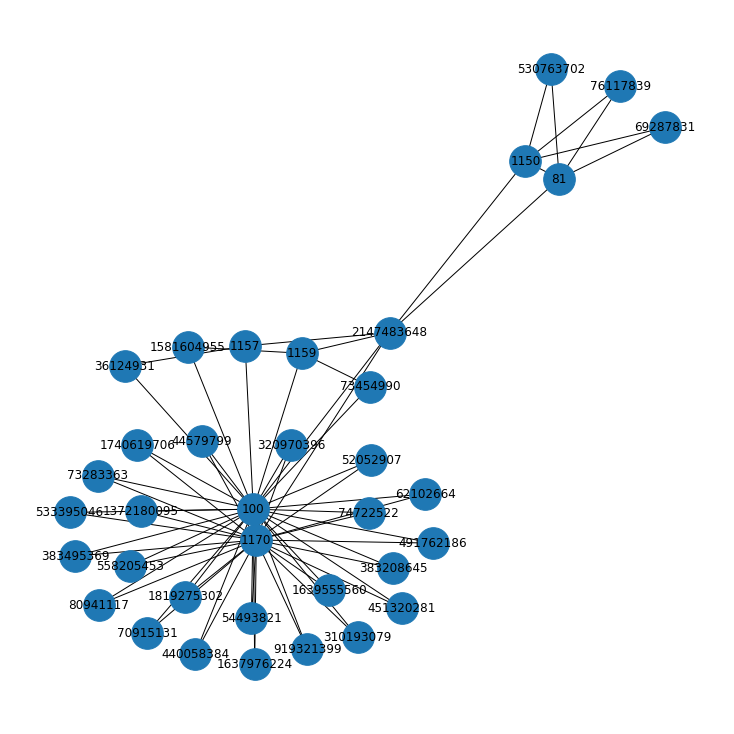

In [26]:
plt.figure(figsize=(10, 10))
nx.draw(G_to_draw, 
        node_size=1000, 
        with_labels=True)

as can be seen in the above plot, there are some IDs(nodes with 10 characters) that are connected to other IDs which it means that they are some how related to eachother im their second other neighborhood(one hopp away from eachother)

In [29]:
G_full = nx.Graph()
for index, row in df.iterrows():
    set_node_attributes(G_full, row[attribute_cols].values, name=row['ID'])
    # G_full.add_edge(row['ID'], row['AGENT_NAME'])
    G_full.add_edge(row['ID'], row['SUPERVISOR_ISSUE'])
    G_full.add_edge(row['ID'], row['PLACE_ISSUED'])
    G_full.add_edge(row['SUPERVISOR_ISSUE'], row['PLACE_ISSUED'])

In [ ]:
print(nx.info(G_full))

In [30]:
pr = pagerank(G_full, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, dangling=None)

Now that we have the rankings for the nodes, we will now add them to the dataframe as a column.

In [31]:
df['pagerank_id'] = df['ID'].apply(lambda x: pr[x])
# df['pagerank_agent_name'] = df['AGENT_NAME'].apply(lambda x: pr[x])
df['pagerank_supervisor_issue'] = df['SUPERVISOR_ISSUE'].apply(lambda x: pr[x])
df['pagerank_place_issue'] = df['PLACE_ISSUED'].apply(lambda x: pr[x])

In [32]:
df['pagerank_id'].max()

0.0035717463184031894

In [ ]:
# df['pagerank_agent_name'].max()

In [33]:
df['pagerank_supervisor_issue'].max()

0.09104374365314861

In [34]:
df['pagerank_place_issue'].max()

0.09104374365314861

Let’s now calculate the degree centrality of nodes in the graph. The degree of a
node is the number of connections it has. This includes only the direct connections
of that node. NetworkX package provides a function, nx.degree_centrality(), which
calculates the ratio of the degree of each node to the maximum possible number of
connections in the graph.

And them as features to the dataframe.

In [35]:
dc = nx.degree_centrality(G_full)

df['degree_centrality_id'] = df['ID'].apply(lambda x: dc[x])
# df['degree_centrality_agent_name'] = df['AGENT_NAME'].apply(lambda x: dc[x])
df['degree_centrality_supervisor_issue'] = df['SUPERVISOR_ISSUE'].apply(lambda x: dc[x])
df['degree_centrality_place_issue'] = df['PLACE_ISSUED'].apply(lambda x: dc[x])


In [36]:
df.head(5)

,ID,PREVIOUS_INS_CO_NAME,SUPERVISOR_ISSUE,PLACE_ISSUED,HISTORY_OF_PERSONS_CLAIMS,CARS_ SILENDER,CAR_AGE,PREMIUM,CAR_VALUE,NO_PEOPLE_IN_CAR,DISTRICT_OF_FILE,pagerank_id,pagerank_supervisor_issue,pagerank_place_issue,degree_centrality_id,degree_centrality_supervisor_issue,degree_centrality_place_issue
0,2147483648,4,81,1150,0,1,1388,3377088,120000000,4,5,0.003572,0.042423,0.001047,0.020596,0.204376,0.004881
1,530763702,0,81,1150,1,1,1390,11303885,750000000,5,5,0.000021,0.042423,0.001047,0.000086,0.204376,0.004881
2,76117839,0,81,1150,1,1,1384,1579220,80000000,4,5,0.000021,0.042423,0.001047,0.000086,0.204376,0.004881
3,2147483648,5,81,1150,2,1,1385,1081389,85000000,4,5,0.003572,0.042423,0.001047,0.020596,0.204376,0.004881
4,2147483648,0,81,1150,1,1,1388,1482624,120000000,5,5,0.003572,0.042423,0.001047,0.020596,0.204376,0.004881


Now that we have our network features in the original DF, we need to perform pre_processing through StandardScaler and OneHotEncoder again. 

Our numerical features have increased, this is because the network features are numerical in nature.

In [37]:

num_attribs = ['ID', 
                'CARS_ SILENDER',
                'CAR_AGE', 
                'PREMIUM', 
                'CAR_VALUE', 
                'NO_PEOPLE_IN_CAR',
                # 'AGENT_NAME',
                'pagerank_id',
                # 'pagerank_agent_name',
                'pagerank_supervisor_issue',
                'pagerank_place_issue',
                'degree_centrality_id',
                # 'degree_centrality_agent_name',
                'degree_centrality_supervisor_issue',
                'degree_centrality_place_issue']

cat_attribs = ['PREVIOUS_INS_CO_NAME',	
                'SUPERVISOR_ISSUE',	
                'PLACE_ISSUED',	
                # 'AGENT_NAME',
                'HISTORY_OF_PERSONS_CLAIMS', 
                'DISTRICT_OF_FILE',
                ]


X_network_features, network_attributes = pre_process(df, num_attribs, cat_attribs)


Higher values of clustering coefficients and transitivity may indicate that the
graph exhibits the small-world effect, which is one of the properties of social networks. This property predicts that any two individuals are no more than six links
away from each other.
Let’s also compute the radius (the minimum path length between any two nodes)
and the diameter (the maximum path length between any two nodes).

In [38]:
from networkx import connected_components
connected_comps = connected_components(G_full)

# print(connected_comps)
# for component in connected_comps:
#     print(nx.radius(component))

min(nx.connected_components(G_full), key=len)



{280, 6168, 7160, 23042915, 76156631}

In [ ]:
list(nx.isolates(G_full))

In [ ]:
# It goes along with the small-world effect, it has no more than 6 links
nx.diameter(G_full)

In [ ]:
nx.average_shortest_path_length(G_full)

In [ ]:
#The nx.all_pairs_shortest_path() function will allow us to see a list of the shortest paths for every node in the graph:
print(nx.all_pairs_shortest_path(G_full))

In [39]:
network_train_set, network_test_set = train_test_split(X_network_features.toarray(), test_size=0.3, random_state=123)

In [40]:
train_set, test_set = train_test_split(X_prepared.toarray(), test_size=0.3, random_state=123)

# Principal Component Analysis (PCA)

To better analyse the clusters and be able to plot what was happening behind the scenes, PCA was used with 2 components.



However, first we wanted to see if going from 3 to 2 n_components was making the data lose its essense/information.

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_3 = PCA(n_components=3)

Plot the PCA data with 3 components onto a 3D scatter.

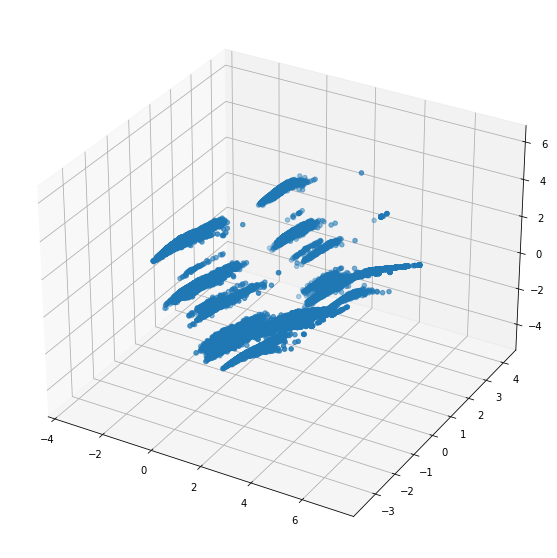

In [42]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# PCA with 3 components for the data without network features
X3D_nonetwork = pca_3.fit_transform(train_set)

# # PCA with 3 components for the data with network features
X3D_network = pca_3.fit_transform(network_train_set)

ax.scatter3D(X3D_network[:, 0],X3D_network[:, 1],X3D_network[:, 2], cmap= "jet")
plt.show()



In [ ]:
# Transforming the Test set for both with and without network features to predict and analyse later
X3D_nonetwork_test = pca_3.fit_transform(test_set)
X3D_network_test =  pca_3.fit_transform(network_test_set)

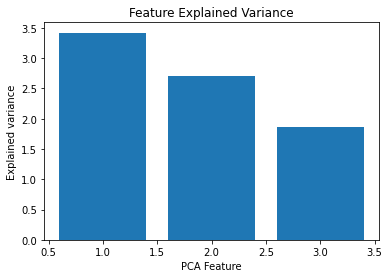

In [43]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca_3.explained_variance_)+1),
    pca_3.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

We can see from the previous plot that the first principal component explains more than 50% of the variance.
Now we will take a look at what features (from the data with network features) impact each principal component by looking at the correlation.

In [44]:
# Principal components correlation coefficients
loadings = pca_3.components_
 
# Number of features before PCA
n_features = pca_3.n_features_
 
# Feature names before PCA (for the PCA with network features)
feature_names = network_attributes
 
# PC (principal components) names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3
feature_names,,,
ID,0.190250,0.508006,0.017906
CARS_ SILENDER,-0.009118,0.054182,-0.020556
CAR_AGE,0.257112,-0.121810,0.382762
PREMIUM,0.340127,-0.119453,0.277620
CAR_VALUE,0.252354,-0.145681,0.362069
...,...,...,...
DISTRICT_OF_FILE_22,-0.003121,0.006951,-0.004934
DISTRICT_OF_FILE_23,-0.000428,-0.000014,-0.000511
DISTRICT_OF_FILE_24,0.000017,0.001790,-0.000583


In [45]:
loadings_df['PC1'].max()

0.4255701438793974

We can then see that the highest contributing feature for the first PC is the pagerank on AGENT_NAME

In [46]:
loadings_df[(loadings_df['PC1'] == loadings_df['PC1'].max() )]

,PC1,PC2,PC3
feature_names,,,
degree_centrality_place_issue,0.42557,-0.153024,0.014243


In [47]:
loadings_df['PC2'].max()

0.5535258561285787

We can then see that the highest contributing feature for the second PC is the pagerank on ID

In [48]:
loadings_df[(loadings_df['PC2'] == loadings_df['PC2'].max() )]

,PC1,PC2,PC3
feature_names,,,
degree_centrality_id,0.193729,0.553526,0.038572


In [49]:
loadings_df['PC3'].max()

0.5289275491835526

We can then see that the highest contributing feature for the third PC is the pagerank on PREVIOUS_INS_CO_NAME_1, meaning the category 1 for PREVIOUS_INS_CO_NAME

In [50]:
loadings_df[(loadings_df['PC3'] == loadings_df['PC3'].max() )]

,PC1,PC2,PC3
feature_names,,,
pagerank_supervisor_issue,-0.314501,0.083027,0.528928


# Isolation Forest

In [51]:
from sklearn.ensemble import IsolationForest
contamination = 0.01

Plot the anomalies detected by the IsolationForest on the PCA data with 3 components.

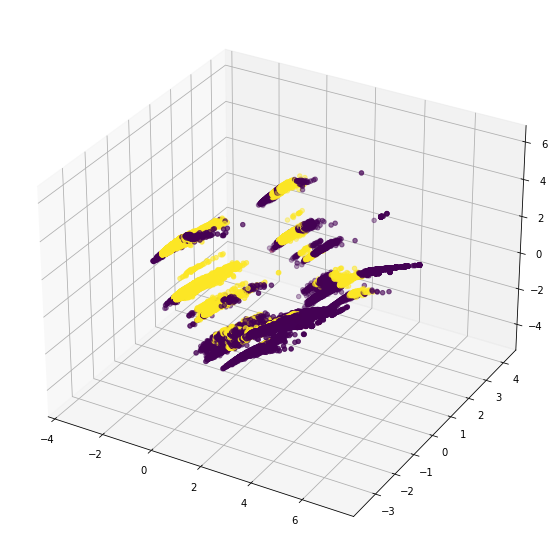

In [52]:
x3d_net_if = IsolationForest(n_estimators=10, random_state=123)

x3d_net_if.fit(X3D_network)

x3d_net_pred = x3d_net_if.predict(X3D_network)

x3d_net_dense = x3d_net_if.score_samples(X3D_network)
x3d_net_dense_threshold = np.percentile(x3d_net_dense, 0.2)
x3d_net_anomalies = X3D_network[x3d_net_dense < x3d_net_dense_threshold]

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter3D(X3D_network[:, 0],X3D_network[:, 1],X3D_network[:, 2], c=x3d_net_pred, cmap= "viridis")
ax.scatter3D(x3d_net_anomalies[:, 0], x3d_net_anomalies[:, 1], x3d_net_anomalies[:, 2], color='r', marker='*')

Now plotting the PCA data with 3 components WITHOUT network features.

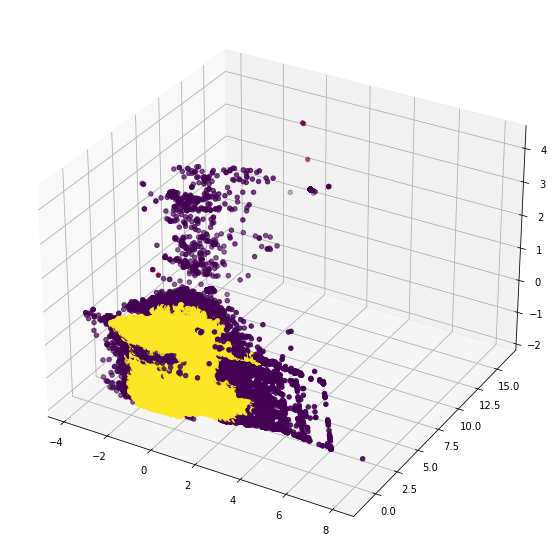

In [53]:
x3d_nonet_if = IsolationForest(n_estimators=10, random_state=123)

x3d_nonet_if.fit(X3D_nonetwork)

x3d_nonet_pred = x3d_nonet_if.predict(X3D_nonetwork)

x3d_nonet_dense = x3d_nonet_if.score_samples(X3D_nonetwork)
x3d_nonet_dense_threshold = np.percentile(x3d_nonet_dense, 0.2)
x3d_nonet_anomalies = X3D_nonetwork[x3d_nonet_dense < x3d_nonet_dense_threshold]

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter3D(X3D_nonetwork[:, 0],X3D_nonetwork[:, 1],X3D_nonetwork[:, 2], c=x3d_nonet_pred, cmap= "viridis")
ax.scatter3D(x3d_nonet_anomalies[:, 0], x3d_nonet_anomalies[:, 1], x3d_nonet_anomalies[:, 2], color='r', marker='*')

There are many points to be made about the differences in the 3D scatter plots between using and not using network features.
1. Clusters are very hard to identify without the network features and seem to overlap quite a bit.
2. Following the first point, the network features are adding extremely useful information in distinguishing clusters of data.
3. Without the network features, the same parameter IsolationForest will not detect plenty of existing anomalies.

In [54]:
# PCA for the data without network features
X2D_nonetwork = pca.fit_transform(train_set)

# PCA for the data with network features
X2D_network = pca.fit_transform(network_train_set)

### Plotting PCA(n_components=2) with IsolationForest

Without network features:

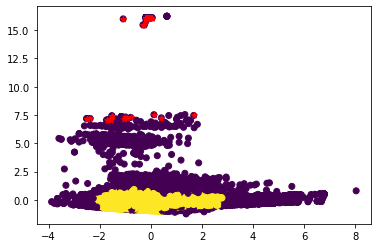

In [55]:
x2d_nonetwork_if_model = IsolationForest(n_estimators=10, random_state=123)

x2d_nonetwork_if_model.fit(X2D_nonetwork)

nonetwork_predictions_if = x2d_nonetwork_if_model.predict(X2D_nonetwork)

densities_without_network = x2d_nonetwork_if_model.score_samples(X2D_nonetwork)
density_threshold_without_network = np.percentile(densities_without_network, 0.2)
anomalies_without_network = X2D_nonetwork[densities_without_network < density_threshold_without_network]

plt.scatter(X2D_nonetwork[:, 0], X2D_nonetwork[:,1], c=nonetwork_predictions_if) 
plt.scatter(anomalies_without_network[:, 0], anomalies_without_network[:, 1], color='r', marker='*')
plt.show()

With network features:

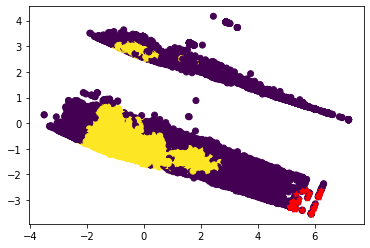

In [56]:
x2d_network_if_model = IsolationForest(n_estimators=10, random_state=123)

x2d_network_if_model.fit(X2D_network)

network_predictions_if = x2d_network_if_model.predict(X2D_network)

densities_network = x2d_network_if_model.score_samples(X2D_network)
density_threshold_network = np.percentile(densities_network, 0.2)
anomalies_network = X2D_network[densities_network < density_threshold_network]

plt.scatter(X2D_network[:, 0], X2D_network[:,1], c=network_predictions_if) 
plt.scatter(anomalies_network[:, 0], anomalies_network[:, 1], color='r', marker='*')
plt.show()

# DBSCAN

In [57]:
from sklearn.cluster import DBSCAN

In [58]:
dbscan_model = DBSCAN(eps=0.9).fit(X2D_network)

print(len(dbscan_model.labels_))
print(len(dbscan_model.core_sample_indices_))
print(len(dbscan_model.core_sample_indices_))


53325
53324
53324


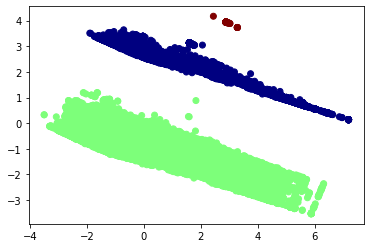

In [59]:
# Ploting the clusters
plt.scatter(X2D_network[:, 0], X2D_network[:,1], c=dbscan_model.labels_,  cmap= "jet") 
plt.show()

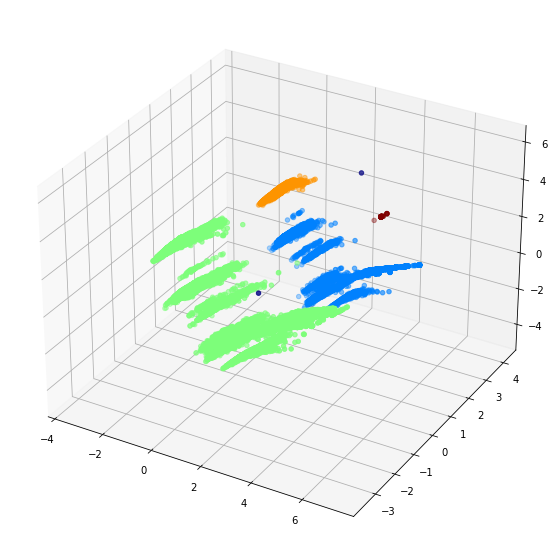

In [60]:
dbscan_x3d_model = DBSCAN(eps=0.9).fit(X3D_network)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter3D(X3D_network[:, 0],X3D_network[:, 1],X3D_network[:, 2], c=dbscan_x3d_model.labels_, cmap= "jet")

In [61]:
print(np.unique(dbscan_x3d_model.labels_))

[-1  0  1  2  3]


DBSCAN ran on PCA data (3 PCs) without network features

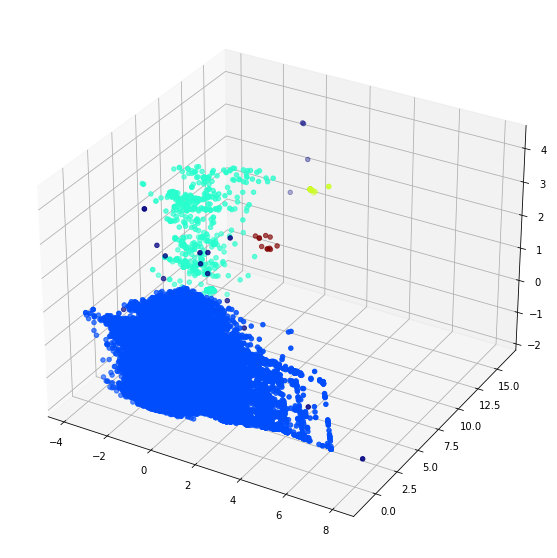

In [62]:
dbscan_x3d_nonetwork_model = DBSCAN(eps=0.9).fit(X3D_nonetwork) 

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter3D(X3D_nonetwork[:, 0],X3D_nonetwork[:, 1],X3D_nonetwork[:, 2], c=dbscan_x3d_nonetwork_model.labels_, cmap= "jet")

# One Class SVM

In [63]:
from sklearn import svm

## One Class SVM **with** network features

In [64]:
svm_model = svm.OneClassSVM(nu=0.1, kernel='sigmoid', gamma='auto')
svm_model.fit(X2D_network)
svm_predictions = svm_model.predict(X2D_network)

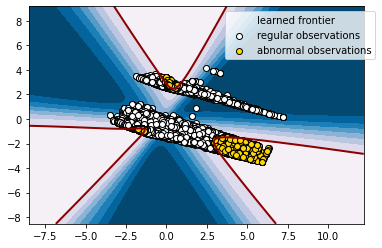

In [65]:
# define the meshgrid
x_min, x_max = X2D_network[:, 0].min() - 5, X2D_network[:, 0].max() + 5
y_min, y_max = X2D_network[:, 1].min() - 5, X2D_network[:, 1].max() + 5

x_ = np.linspace(x_min, x_max, 500)
y_ = np.linspace(y_min, y_max, 500)

xx, yy = np.meshgrid(x_, y_)

# evaluate the decision function on the meshgrid
z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# plot the decision function and the reduced data
plt.contourf(xx, yy, z, cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
b = plt.scatter(X2D_network[svm_predictions == 1, 0], X2D_network[svm_predictions == 1, 1], c='white', edgecolors='k')
c = plt.scatter(X2D_network[svm_predictions == -1, 0], X2D_network[svm_predictions == -1, 1], c='gold', edgecolors='k')
plt.legend([a.collections[0], b, c], ['learned frontier', 'regular observations', 'abnormal observations'], bbox_to_anchor=(1.05, 1))
plt.axis('tight')
plt.show()

Besides sigmoid and rbf, kernels linear and poly were tried, displaying really bad results for anomaly detection.

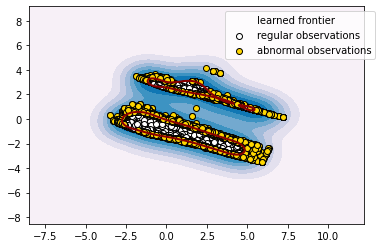

In [66]:
# Testing with sigmoid kernel
svm_model_rbf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma='auto')
svm_model_rbf.fit(X2D_network)
svm_rbf_predictions = svm_model_rbf.predict(X2D_network)

# define the meshgrid
x_min, x_max = X2D_network[:, 0].min() - 5, X2D_network[:, 0].max() + 5
y_min, y_max = X2D_network[:, 1].min() - 5, X2D_network[:, 1].max() + 5

x_ = np.linspace(x_min, x_max, 500)
y_ = np.linspace(y_min, y_max, 500)

xx, yy = np.meshgrid(x_, y_)

# evaluate the decision function on the meshgrid
z = svm_model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# plot the decision function and the reduced data
plt.contourf(xx, yy, z, cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
b = plt.scatter(X2D_network[svm_rbf_predictions == 1, 0], X2D_network[svm_rbf_predictions == 1, 1], c='white', edgecolors='k')
c = plt.scatter(X2D_network[svm_rbf_predictions == -1, 0], X2D_network[svm_rbf_predictions == -1, 1], c='gold', edgecolors='k')
plt.legend([a.collections[0], b, c], ['learned frontier', 'regular observations', 'abnormal observations'], bbox_to_anchor=(1.05, 1))
plt.axis('tight')
plt.show()

Running with multiple (increasing) values for nu yielded worse results, as it was classifying a lot of parts as anomalies.

In [ ]:
# define the meshgrid
x_min, x_max = X2D_network[:, 0].min() - 5, X2D_network[:, 0].max() + 5
y_min, y_max = X2D_network[:, 1].min() - 5, X2D_network[:, 1].max() + 5

x_ = np.linspace(x_min, x_max, 500)
y_ = np.linspace(y_min, y_max, 500)

xx, yy = np.meshgrid(x_, y_)
plt.figure()
nus = [0.1, 0.2, 0.3]

fig, axs = plt.subplots(nrows=len(nus), figsize=(15, 12))
fig.suptitle("Different Nus for SVMOneClass kernel=sigmoid", fontsize=18, y=0.95)
nu_counter = 0
for ax in axs:
    print("Testing nu: ", nus[nu_counter])
    svm_model = svm.OneClassSVM(nu=nus[nu_counter], kernel='sigmoid', gamma='auto')
    svm_model.fit(X2D_network)
    svm_predictions = svm_model.predict(X2D_network)

    # evaluate the decision function on the meshgrid
    z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)

    # plot the decision function and the reduced data
    ax.contourf(xx, yy, z, cmap=plt.cm.PuBu)
    a = ax.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
    b = ax.scatter(X2D_network[svm_predictions == 1, 0], X2D_network[svm_predictions == 1, 1], c='white', edgecolors='k')
    c = ax.scatter(X2D_network[svm_predictions == -1, 0], X2D_network[svm_predictions == -1, 1], c='gold', edgecolors='k')
    ax.legend([a.collections[0], b, c], ['learned frontier', 'regular observations', 'abnormal observations'], bbox_to_anchor=(1.05, 1))
    ax.axis('tight')
    ax.set_title("Nu = %s" % nus[nu_counter])
    nu_counter += 1

plt.show()

## One Class SVM **without** network features

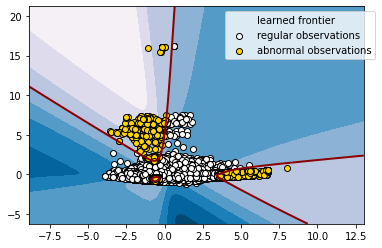

In [67]:
svm_model_nonetwork = svm.OneClassSVM(nu=0.1, kernel='sigmoid', gamma='auto')
svm_model_nonetwork.fit(X2D_nonetwork)
svm_nonetwork_predictions = svm_model_nonetwork.predict(X2D_nonetwork)

# define the meshgrid
x_min, x_max = X2D_nonetwork[:, 0].min() - 5, X2D_nonetwork[:, 0].max() + 5
y_min, y_max = X2D_nonetwork[:, 1].min() - 5, X2D_nonetwork[:, 1].max() + 5

x_ = np.linspace(x_min, x_max, 500)
y_ = np.linspace(y_min, y_max, 500)

xx, yy = np.meshgrid(x_, y_)

# evaluate the decision function on the meshgrid
z = svm_model_nonetwork.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# plot the decision function and the reduced data
plt.contourf(xx, yy, z, cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
b = plt.scatter(X2D_nonetwork[svm_nonetwork_predictions == 1, 0], X2D_nonetwork[svm_nonetwork_predictions == 1, 1], c='white', edgecolors='k')
c = plt.scatter(X2D_nonetwork[svm_nonetwork_predictions == -1, 0], X2D_nonetwork[svm_nonetwork_predictions == -1, 1], c='gold', edgecolors='k')
plt.legend([a.collections[0], b, c], ['learned frontier', 'regular observations', 'abnormal observations'], bbox_to_anchor=(1.05, 1))
plt.axis('tight')
plt.show()

# KMeans and the Elbow method

In [68]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [ ]:
k_values = list(range(2,10))
inertias = []
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(network_train_set)
    inertias.append(km.inertia_)

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(5.5, 5.5))
plt.plot(k_values, inertias, marker='.')
plt.xlabel('number of clusters')
plt.xlabel('WCSS')

In [ ]:

plt.plot(k_values[1:], np.diff(inertias), marker='.')
plt.xticks(k_values)
plt.xlabel('number of clusters')
plt.xlabel('WCSS differential')

In [ ]:

k_values = list(range(2,10))
sil_scores = []
ch_scores = []
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(network_train_set)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(network_train_set, km.labels_))
    ch_scores.append(calinski_harabasz_score(network_train_set, km.labels_))

print(sil_scores)

In [ ]:
plt.plot(k_values, sil_scores, marker='.')
plt.xticks(k_values)
plt.xlabel('number of clusters')
plt.xlabel('Silhouette score')

In [ ]:
plt.plot(k_values, ch_scores, marker='.')
plt.xticks(k_values)
plt.xlabel('number of clusters')
plt.xlabel('calinski harabasz score')

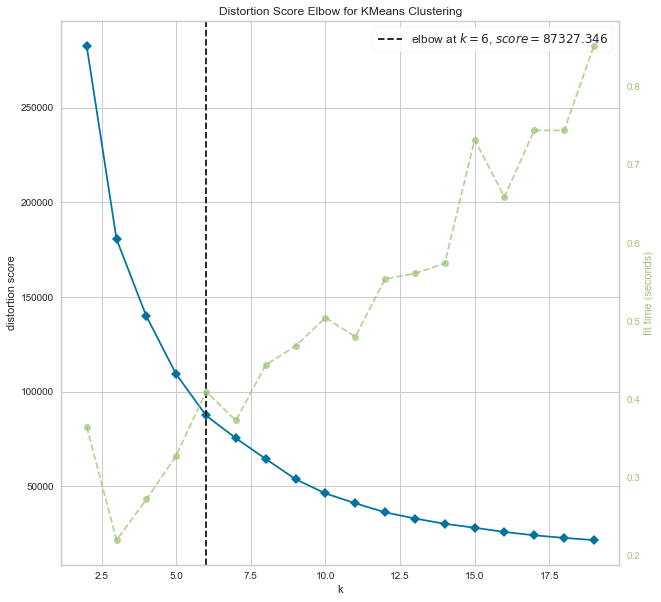

In [69]:
f = plt.figure(figsize=(10, 10))
viz = kelbow_visualizer(KMeans(), X3D_network, k=(2, 20), show=False)


In [70]:
viz.k_scores_

[282787.8161183082,
 180590.83467355405,
 139817.16284367448,
 109152.0070342168,
 87327.34639917398,
 75304.15641615557,
 64365.42367419816,
 53641.821342140924,
 46129.619583304164,
 40909.06595815644,
 36123.70244273015,
 32841.2298198675,
 30073.192192628932,
 27962.934791325053,
 25736.40769209423,
 23967.32876526368,
 22597.148919451312,
 21436.63801889249]

In [71]:
viz.k_values_

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

The elbow method suggest a k=6 clusters, a very similar number to the visually detected clusters in the first 3D plot of the PCA(n_components=3) data.

### Training and plotting a Kmeans with 6 clusters as proposed by the elbow method

In [72]:
km6_x3d = KMeans(n_clusters=6)
km6_x3d.fit(X3D_network)
km6_x3d.inertia_
labels =  km6_x3d.predict(X3D_network)
centroids = km6_x3d.cluster_centers_

C:\Users\Lucxis\AppData\Local\Temp\ipykernel_10036\16579920.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


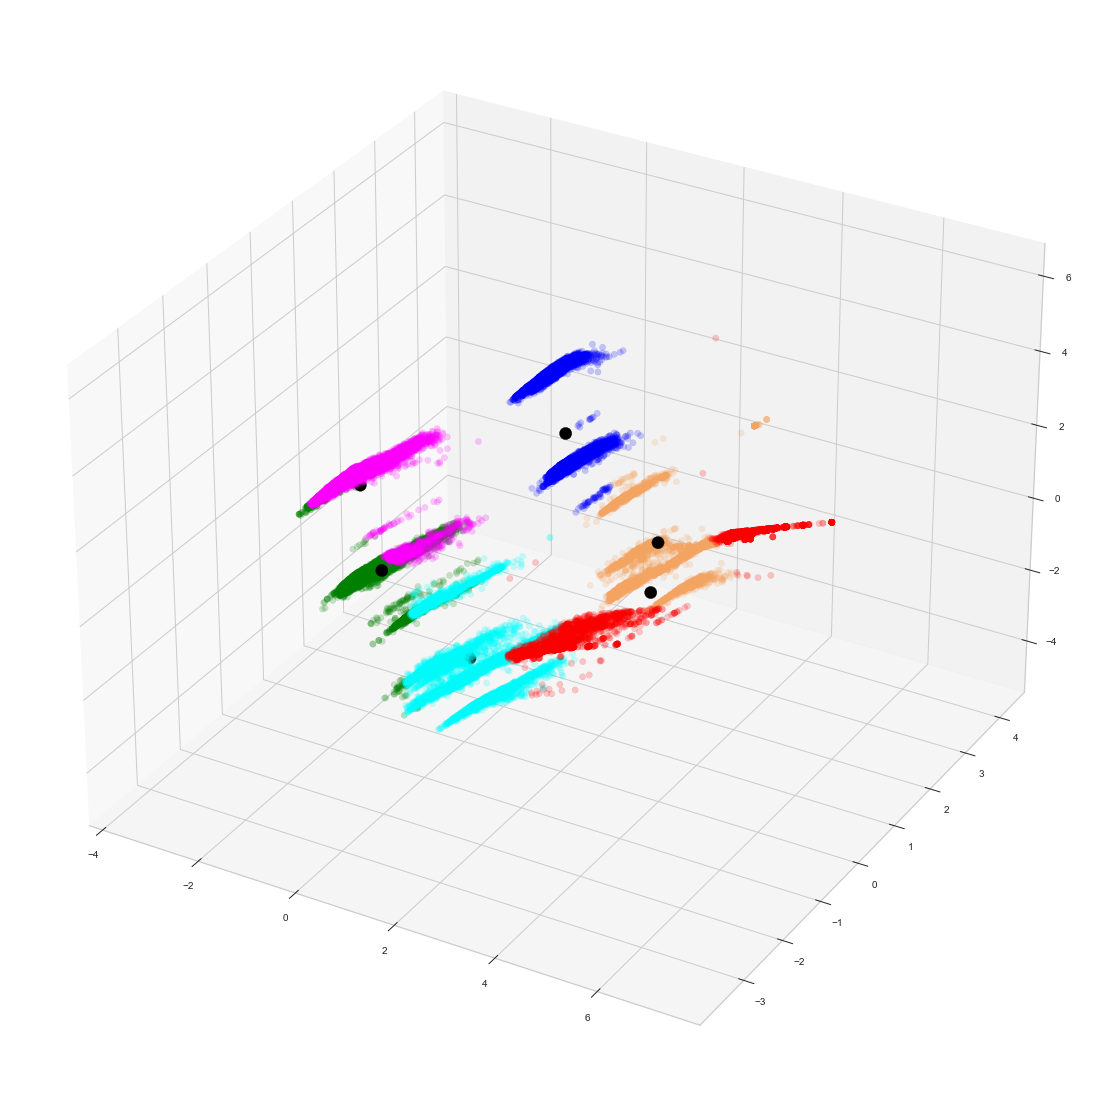

In [73]:
colors = ['blue','green','red','cyan','magenta','sandybrown']

points_in_cluster = []
for i in range(centroids.shape[0]):
    points_in_cluster.append(np.array(labels==i))

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')

for i in range(0,len(points_in_cluster)):
    ax.scatter(X3D_network[points_in_cluster[i],0],X3D_network[points_in_cluster[i],1],X3D_network[points_in_cluster[i],2],c=colors[i],s=40,label="C%s"%i, alpha=0.2,cmap='jet')
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c="black",s=150,label="Centers",alpha=1 )



The elbow method and the plotting of the clusters and centroids really shows that the initial 3D plotting 

# Results Assessment

For the result assessment, as we are using unsupervised methods, we cannot simply plot ROC, so we used the silhouette score to try and capture which method is better.
However, one slight problem is that our data is 3 dimensional and clusters may seem to overlap on the plane and output low silhouette scores despite them visually displaying a clustering (in the 3D as opposed to 2). Furthermore, in the previous section of data analysis, we can clearly see that reducing the dimensionality of the data to two dimensions does not help because it clusters a lot of the data into one cluster.

In [74]:
# ADD HERE THE TEST FOR PREDICTING INSTEAD OF THE TRAIN
y_train_if_network = x3d_net_pred
y_train_if_nonetwork = x3d_nonet_pred

y_train_DBSCAN_network= dbscan_x3d_model.labels_
y_train_DBSCAN_no_network = dbscan_x3d_nonetwork_model.labels_

y_train_SVM_network_train = svm_predictions
y_train_SVM_nonetwork_train = svm_nonetwork_predictions

In [75]:
if_net_sil_score = silhouette_score(X3D_network, y_train_if_network)
if_nonet_sil_score = silhouette_score(X3D_nonetwork, y_train_if_nonetwork)

dbscan_net_sil_score = silhouette_score(X3D_network, y_train_DBSCAN_network)
dbscan_nonet_sil_score = silhouette_score(X3D_nonetwork, y_train_DBSCAN_no_network)

svm_net_sil_score = silhouette_score(X2D_network, y_train_SVM_network_train)
svm_notnet_sil_score = silhouette_score(X2D_nonetwork, y_train_SVM_nonetwork_train)


In [76]:
print("SILHOUETTE SCORES")
print(10*"#")
print("* Isolation Forest (3 PC)")
print("** with network features")
print("Score: ", if_net_sil_score)
print("** without network features")
print("Score: ", if_nonet_sil_score)
print(10*"#")
print("* DBSCAN (3 PC)")
print("** with network features")
print("Score: ", dbscan_net_sil_score)
print("** without network features")
print("Score: ", dbscan_nonet_sil_score)
print(10*"#")
print("* SVM One Class (2 PC)")
print("** with network features")
print("Score: ", svm_net_sil_score)
print("** without network features")
print("Score: ", svm_notnet_sil_score)
print(10*"#")

SILHOUETTE SCORES
##########
* Isolation Forest (3 PC)
** with network features
Score:  0.25246776011277694
** without network features
Score:  0.34584236065988117
##########
* DBSCAN (3 PC)
** with network features
Score:  0.32197215652651395
** without network features
Score:  0.4195009311617453
##########
* SVM One Class (2 PC)
** with network features
Score:  0.20368017855265613
** without network features
Score:  0.4453823394895796
##########


The silhouette scores tell us that not training without network features is better, and that 2 principal components is better. This may be interpreted in the way that the clusters are better seperated without network features, which as seen before is true, however, it also means that there is very little distinction between the existing datapoints since it finds only 2 clusters without the network features.


In [77]:
import shap

C:\Users\Lucxis\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


 98%|===================| 52147/53325 [00:26<00:00]        

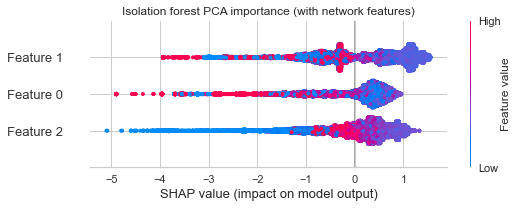

In [78]:
# compute SHAP values
explainer = shap.Explainer(x3d_net_if, X3D_network)
shap_values = explainer(X3D_network)
shap.plots.beeswarm(shap_values, max_display=20, show=False)
plt.title("Isolation forest PCA importance (with network features)")
plt.show()

 99%|===================| 52817/53325 [00:23<00:00]        

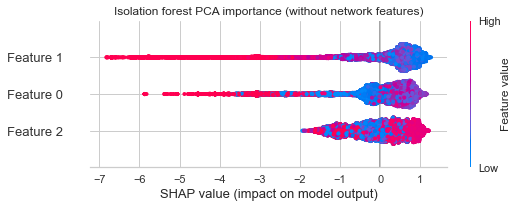

In [79]:
explainer = shap.Explainer(x3d_nonet_if, X3D_nonetwork)
shap_values = explainer(X3D_nonetwork)
shap.plots.beeswarm(shap_values, max_display=20, show=False)
plt.title("Isolation forest PCA importance (without network features)")
plt.show()

In [80]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt

Fitting a logistic regressor with the labels from DBSCAN

In [81]:
linear_clf_dbscan_network = LogisticRegression(solver="liblinear")
result = linear_clf_dbscan_network.fit(network_train_set, y_train_DBSCAN_network)
y_pred = linear_clf_dbscan_network.predict(network_train_set)
y_prob = linear_clf_dbscan_network.predict_proba(network_train_set)
linear_clf_dbscan_network.score(network_train_set, y_train_DBSCAN_network)
print(np.unique(y_pred))



[-1  0  1  2  3]


In [82]:
print(y_train_DBSCAN_network.shape)
print(y_pred.shape)

(53325,)
(53325,)


Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


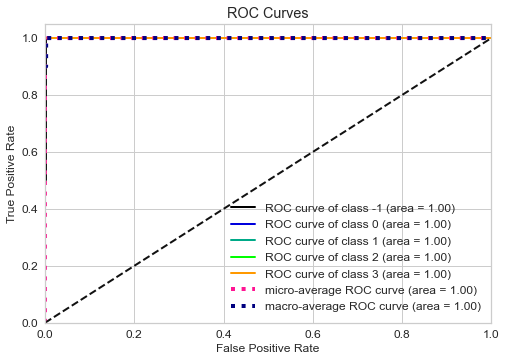

In [83]:
skplt.metrics.plot_roc_curve(y_train_DBSCAN_network, y_prob)
plt.show()

In [84]:
f1score = f1_score(y_train_DBSCAN_network, y_pred, average="micro")
print("Logistic Regression trained on DBSCAN with network features F1 score: ", f1score)

Logistic Regression trained on DBSCAN with network features F1 score:  0.9999812470698547


[[    1     0     1     0     0]
 [    0 11453     0     0     0]
 [    0     0 38794     0     0]
 [    0     0     0  2985     0]
 [    0     0     0     0    91]]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix: trained on DBSCAN with network features')

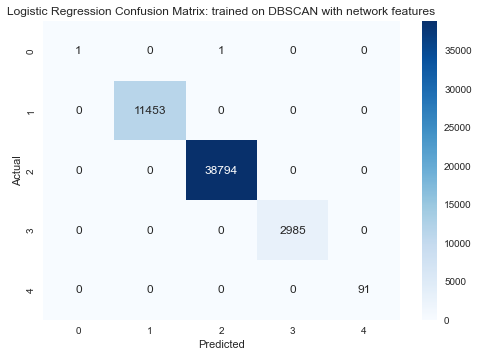

In [85]:
conf_mat = confusion_matrix(y_train_DBSCAN_network, y_pred)
print(conf_mat)

fig, ax = plt.subplots()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Logistic Regression Confusion Matrix: trained on DBSCAN with network features")

In [86]:
linear_clf_dbscan_nonetwork = LogisticRegression(solver="liblinear")
result = linear_clf_dbscan_nonetwork.fit(network_train_set, y_train_DBSCAN_no_network)
y_pred = linear_clf_dbscan_nonetwork.predict(network_train_set)
y_prob = linear_clf_dbscan_nonetwork.predict_proba(network_train_set)
linear_clf_dbscan_nonetwork.score(network_train_set, y_train_DBSCAN_no_network)
np.unique(y_pred)

array([-1,  0,  1,  2], dtype=int64)

In [87]:
f1score = f1_score(y_train_DBSCAN_no_network, y_pred, average="micro")
print("Logistic Regression trained on DBSCAN without network features F1 score: ", f1score)

Logistic Regression trained on DBSCAN without network features F1 score:  0.9992873886544773


[[    2     9     7     3     0     0]
 [    0 52391     0     0     0     0]
 [    1     1   804     0     0     0]
 [    0     0     0    90     0     0]
 [    0     0     6     0     0     0]
 [    0     0    11     0     0     0]]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix: trained on DBSCAN without network features')

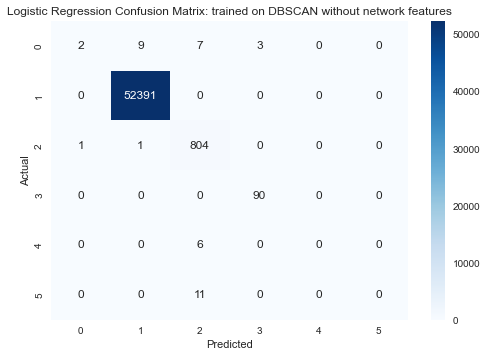

In [88]:
conf_mat = confusion_matrix(y_train_DBSCAN_no_network, y_pred)
print(conf_mat)

fig, ax = plt.subplots()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Logistic Regression Confusion Matrix: trained on DBSCAN without network features")

Fitting a Logistic Regressor with the SVM output.

In [89]:
linear_clf_svm_network = LogisticRegression(solver="liblinear")
result = linear_clf_svm_network.fit(network_train_set, y_train_SVM_network_train)
y_pred = linear_clf_svm_network.predict(network_train_set)
y_prob = linear_clf_svm_network.predict_proba(network_train_set)
linear_clf_svm_network.score(network_train_set, y_train_SVM_network_train)
np.unique(y_pred)

array([-1,  1], dtype=int64)

In [90]:
f1score = f1_score(y_train_SVM_network_train, y_pred, average="micro")
print("Logistic Regression trained on SVM with network features F1 score: ", f1score)

Logistic Regression trained on SVM with network features F1 score:  0.9007782466010315


[[  610  4723]
 [  568 47424]]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix: trained on SVM with network features')

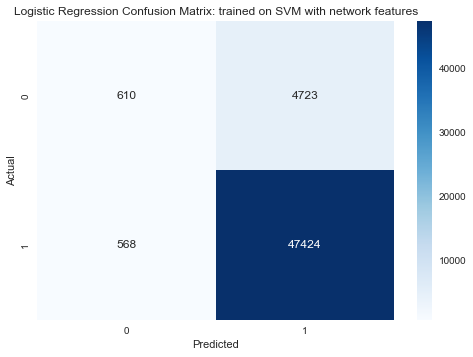

In [91]:
conf_mat = confusion_matrix(y_train_SVM_network_train, y_pred)
print(conf_mat)

fig, ax = plt.subplots()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Logistic Regression Confusion Matrix: trained on SVM with network features")

In [92]:
linear_clf_svm_nonetwork = LogisticRegression(solver="liblinear")
result = linear_clf_svm_nonetwork.fit(network_train_set, y_train_SVM_nonetwork_train)
y_pred = linear_clf_svm_nonetwork.predict(network_train_set)
y_prob = linear_clf_svm_nonetwork.predict_proba(network_train_set)
linear_clf_svm_nonetwork.score(network_train_set, y_train_SVM_nonetwork_train)
np.unique(y_pred)

array([-1,  1], dtype=int64)

In [93]:
f1score = f1_score(y_train_SVM_nonetwork_train, y_pred, average="micro")
print("Logistic Regression trained on SVM without network features F1 score: ", f1score)

Logistic Regression trained on SVM without network features F1 score:  0.9330707923112986


[[ 2197  3135]
 [  434 47559]]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix: trained on SVM without network features')

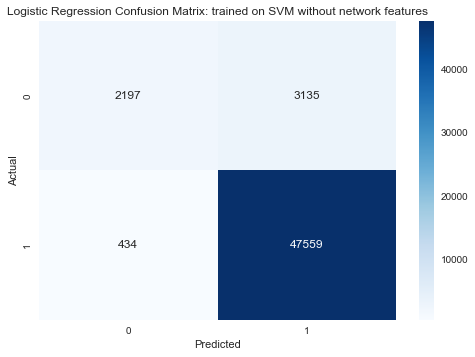

In [95]:
conf_mat = confusion_matrix(y_train_SVM_nonetwork_train, y_pred)
print(conf_mat)

fig, ax = plt.subplots()
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Logistic Regression Confusion Matrix: trained on SVM without network features")

### Feature Importances
In this section we train a Decision Tree Classifier on the data pre-PCA with network features, so that we can better visualize the feature importances of the original data (post processing).

**DBSCAN**: it appears that if we train the Decision Tree Classifier using the DBSCAN outputted labels, the tree tells us that very few (5) features are important, and that pagerank_id is by far the most important. This tells us that the clustering is mostly clustering by pagerank_id.

In [97]:
dt_dbscan = DecisionTreeClassifier(random_state=123)
dt_dbscan.fit(network_train_set, y_train_DBSCAN_network)


DecisionTreeClassifier(random_state=123)

In [98]:
feature_imp_df = pd.DataFrame(dt_dbscan.feature_importances_, index=network_attributes, columns=['importances'])
feature_imp_df.head(5)

,importances
ID,0.000000
CARS_ SILENDER,0.000000
CAR_AGE,0.000000
PREMIUM,0.000178
CAR_VALUE,0.000000


In [99]:
feature_imp_df.sort_values('importances',ascending=False).head(10)

,importances
pagerank_id,0.782401
SUPERVISOR_ISSUE_500000,0.208324
NO_PEOPLE_IN_CAR,0.008034
degree_centrality_place_issue,0.001063
PREMIUM,0.000178
ID,0.000000
PLACE_ISSUED_8129,0.000000
PLACE_ISSUED_8116,0.000000
PLACE_ISSUED_8117,0.000000
PLACE_ISSUED_8120,0.000000


Isolation Forest: the decision tree fit on the IF output appears much more balanced than the DBSCAN one, with a more spread number of feature importances, where the most important feature is actually pagerank_supervisor_issue.

In [102]:
dt_if = DecisionTreeClassifier(random_state=123)
dt_if.fit(network_train_set, y_train_if_network)

feature_imp_df = pd.DataFrame(dt_if.feature_importances_, index=network_attributes, columns=['importances'])
feature_imp_df.sort_values('importances',ascending=False).head(10)

,importances
pagerank_supervisor_issue,0.406843
CAR_AGE,0.134176
CAR_VALUE,0.097150
ID,0.090632
PREMIUM,0.071195
PLACE_ISSUED_100,0.027024
pagerank_id,0.022238
degree_centrality_supervisor_issue,0.019203
degree_centrality_place_issue,0.016981
HISTORY_OF_PERSONS_CLAIMS_1,0.014505


SVM: Outputs more evenly distributed feature importances with CAR_AGE being the most important.

In [104]:
dt_svm = DecisionTreeClassifier(random_state=123)
dt_svm.fit(network_train_set, y_train_SVM_network_train)

feature_imp_df = pd.DataFrame(dt_svm.feature_importances_, index=network_attributes, columns=['importances'])
feature_imp_df.sort_values('importances',ascending=False).head(10)

,importances
CAR_AGE,0.226755
PREMIUM,0.170642
pagerank_id,0.167084
CAR_VALUE,0.109029
degree_centrality_place_issue,0.060220
ID,0.057717
SUPERVISOR_ISSUE_40000,0.033662
PREVIOUS_INS_CO_NAME_0,0.032987
SUPERVISOR_ISSUE_500000,0.031191
HISTORY_OF_PERSONS_CLAIMS_1,0.012730


# Experimentation
Here we just wanted to see if any of the blacklisted datapoints (marked as 1 in the FRAUD_LABEL in the original data) as an anomaly.

In [149]:
# retrieving the fraud labels from the original data
df_original = pd.read_csv("final-data.csv")
df_fraud = pd.DataFrame(df_original['FRAUD_LABEL'].values, columns=["FRAUD_LABEL"])
df_fraud.head(5)

# transforming all the data with the pca n_components = 3
x3d_all_network_features = pca_3.fit_transform(X_network_features.toarray())

# initializing the Isolation Forest 
if_model_final = IsolationForest(n_estimators=10, random_state=123)
if_model_final.fit(x3d_all_network_features)
y_predictions = if_model_final.predict(x3d_all_network_features)





In [159]:

print("Total datapoints: ", y_predictions.size)
print("Anomalies found ",np.where(y_predictions==-1)[0].size)
percent = np.where(y_predictions==-1)[0].size / y_predictions.size *100
print("Percentage of anomalies: ", percent, "% " )



Total datapoints:  76179
Anomalies found  24974
Percentage of anomalies:  32.783312986518595 % 


In [151]:
series_if = pd.Series(y_predictions)
df_fraud['if_fraud'] = series_if
df_fraud['if_fraud'] = df_fraud['if_fraud'].map({1: 0, -1: 1})

df_fraud.head(5)

,FRAUD_LABEL,if_fraud
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,0.0


In [163]:

len(df_fraud[(df_fraud['FRAUD_LABEL'] == 1.0 )& (df_fraud['if_fraud'] ==1.0)])

13

In [153]:
df_fraud[(df_fraud['FRAUD_LABEL'] == 1.0 )].count()

FRAUD_LABEL    62
if_fraud       51
dtype: int64

Out of 62 FRAUD_LABELS in the original data, the Isolation Forest detected 13 as being an anomaly.

In [206]:
dbscan_model = DBSCAN(eps=0.9).fit(x3d_all_network_features)
print(len(dbscan_model.labels_))
print(np.unique(dbscan_model.labels_))

print("Total datapoints: ", dbscan_model.labels_.size)
print("Anomalies found ",np.where(dbscan_model.labels_==-1)[0].size)
percent = np.where(dbscan_model.labels_==-1)[0].size  / dbscan_model.labels_.size * 100
print("Percentage of anomalies: ", percent, "% " )

76179
[-1  0  1  2  3]
Total datapoints:  76179
Anomalies found  3
Percentage of anomalies:  0.0039380931752845275 % 


In [207]:
series_dbscan = pd.Series(dbscan_model.labels_)
df_fraud['dbscan_fraud'] = series_dbscan
len(df_fraud[(df_fraud['FRAUD_LABEL'] == 1.0 )& (df_fraud['dbscan_fraud'] == -1.0)])


0

Out of 62 FRAUD_LABELS, DBSCAN classifies none as an anomaly.